In [25]:
import numpy as np
from cvxopt.solvers import qp
from cvxopt import matrix, solvers
#solvers.options['show_progress'] = False 
import matplotlib.pyplot as plt

In [26]:
# import data
X = np.loadtxt('svm_data.csv', delimiter = ',', unpack=True).T
y = np.loadtxt('svm_labels.csv', delimiter = ',', unpack=True)

In [27]:
#(a)
# make the data workable for cvxopt
Q = matrix(np.diag(y)@X@X.T@np.diag(y), tc='d')
c = matrix(-np.ones(len(y)), tc='d')
A_eq = matrix(y.reshape(1, 200), tc='d')
b_eq = matrix(np.array([0]).reshape(1,1), tc='d')
C_value = 1
C = matrix(np.array([C_value]*len(y)), tc='d')
# stack Identity matrix and negative identity matrix for 0 <= alpha_i <= C
A = matrix(np.vstack((np.eye(len(y)), -np.eye(len(y)))), tc='d')
b = matrix(np.append(C, np.zeros(len(C))), tc='d')

In [47]:
#(b)
alphas =np.array((qp(Q, c, A, b, A_eq, b_eq ))['x'])
#all support vectors

     pcost       dcost       gap    pres   dres
 0: -4.4975e+01 -3.7726e+02  2e+03  2e+00  5e-14
 1: -2.8982e+01 -2.0368e+02  3e+02  3e-01  4e-14
 2: -1.9426e+01 -4.6064e+01  4e+01  4e-02  3e-14
 3: -1.8176e+01 -2.4340e+01  9e+00  7e-03  2e-14
 4: -1.8423e+01 -2.0934e+01  3e+00  2e-03  2e-14
 5: -1.8614e+01 -1.9701e+01  1e+00  3e-06  2e-14
 6: -1.8865e+01 -1.9375e+01  5e-01  1e-06  2e-14
 7: -1.8951e+01 -1.9238e+01  3e-01  3e-07  2e-14
 8: -1.8963e+01 -1.9229e+01  3e-01  2e-07  2e-14
 9: -1.9049e+01 -1.9121e+01  7e-02  5e-08  2e-14
10: -1.9075e+01 -1.9089e+01  1e-02  5e-16  3e-14
11: -1.9082e+01 -1.9082e+01  2e-04  2e-15  3e-14
12: -1.9082e+01 -1.9082e+01  2e-06  2e-15  2e-14
Optimal solution found.


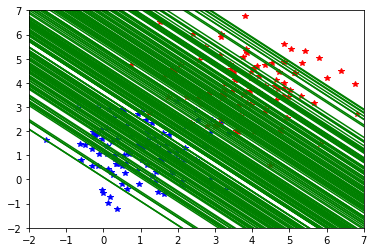

In [48]:
w = np.sum(y.reshape(200,1)*alphas*X, axis=0)
x = np.arange(-2, 8)
cond = np.logical_and(alphas.reshape(200,) > 0.00 , alphas.reshape(200,)< C_value)
plt.figure()
for i in range(int(len(X)/2)):
    plt.plot(X[i][0],X[i][1], 'b*');
for i in range(int(len(X)/2), len(X)):
    plt.plot(X[i][0],X[i][1], 'r*');
for i in range(len(alphas)):
    plt.plot(x, x* -w[0]/w[1] -(y[cond]-(X[cond])@w)[i] / w[1], 'g-')
axes = plt.gca()
axes.set_xlim([-2,7])
axes.set_ylim([-2,7]);    
#plot all support vectors

In [49]:
#(c) get w and b for plot
w = np.sum(y.reshape(200,1)*alphas*X, axis=0)
#important, the alphas should be not at the edge
cond = np.logical_and(alphas.reshape(200,) > 0.01 , alphas.reshape(200,)< C_value-0.01)
b_intercept = y[cond] - X[cond]@w
w, b_intercept
#two solutions, the best of all support vectors

(array([-1.03194069, -1.03815017]), array([4.77837662, 4.77837679]))

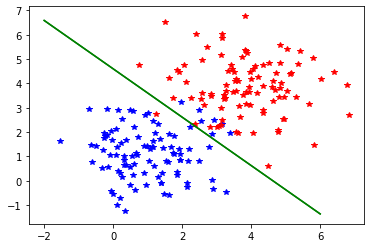

In [50]:
# plot data and all solutions
plt.figure()
for i in range(int(len(X)/2)):
    plt.plot(X[i][0],X[i][1], 'b*');
for i in range(int(len(X)/2), len(X)):
    plt.plot(X[i][0],X[i][1], 'r*');
x = np.arange(-2, 7)
# 0 = w_1*x_1 + w_2*x_2 + b_intersect
plt.plot(x, x * -w[0] / w[1] + -b_intercept[0] / w[1], 'g-');
plt.plot(x, x * -w[0] / w[1] + -b_intercept[1] / w[1], 'g-');